## Borehole Seismic Events - Plotly Tool Development
Author: Kailey Dougherty<br>
Date created: 19-JAN-2025<br>
Date last modified: 26-JAN-2026<br>

In [19]:
%load_ext autoreload
%autoreload 2
from MSView import MSPlot
from WellView import WellPlot
from DASView import DASPlot
from Static3D import StaticDataViewer
from VisualizeModel import DataViewer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# MS

# Allow the user to input the relative file path for their dataset.
MS_filepath = 'data\\Borehole_Seismic_Aniso_Events_4H_AllStages_AllEvents_06112019_processed.csv'

MSViewer = MSPlot()

# Call the method to parse the file.
MSViewer.load_csv(MS_filepath)

# Set visualization attributes.
MSViewer.set_start_time('2019-04-15 00:00:00.000')
MSViewer.set_end_time('2019-04-17 0:00:00.000')
MSViewer.set_sizeby('Brune Magnitude')
MSViewer.set_colorby('Stage')
MSViewer.set_colorscale('Viridis')
MSViewer.set_colorbar_range(None)

# Create the visualization.
MSplot = MSViewer.create_plot()

Success!


In [21]:
# Well trajectories

# Allow the user to input the relative file path for their dataset.
well_filepathB1H = 'data\\transformed_B1H.csv'
well_filepathB2H = 'data\\transformed_B2H.csv'
well_filepathB3H = 'data\\transformed_B3H.csv'
well_filepathB4H = 'data\\transformed_B4H.csv'

well_filepaths = [well_filepathB1H, well_filepathB2H, well_filepathB3H, well_filepathB4H]

WellViewer = WellPlot()

# Call the method to parse the file.
WellViewer.load_csv(welltraj_files=well_filepaths)

# Set attributes for visualization.
WellViewer.set_colors(['red', 'blue', 'green', 'black'])

# Create the visualization.
well_plot = WellViewer.create_plot()

Success!


In [22]:
# DAS

# Allow the user to input the relative file path for their dataset.
DAS_filepathB4H = 'data\\HFTS2_LFDAS_data\\B4_B3_0.1Hz_mapped.h5'
DAS_filepathB1H = 'data\\HFTS2_LFDAS_data\\B1_B3_0.1Hz_mapped.h5'

# Input the local path to JIN_pylib.
package_path = '.'

DASViewer = DASPlot()

# Call the method to load the file.
DASViewer.load_h5(pylib=package_path, filepaths=[DAS_filepathB4H, DAS_filepathB1H], labels=['B4H', 'B1H'])


# Set attributes for visualization.
DASViewer.color_scale = 'RdBu'
DASViewer.colorbar_range = (-1000, 1000)

# DASViewer.set_time_range(bgtime, edtime) try to do this 
######### START WORK ON THIS FUNCTIONALITY #########

# Create the visualization with depth offset
DASplot = DASViewer.create_plot()

# Create waterfall for the first DAS dataset (B4H)
DASwaterfall_B4H = DASViewer.create_waterfall(
    das_index=0,  # First dataset
    starttime='2019-04-15 00:00:00', 
    endtime='2019-04-17 00:00:00',
    selected_time='2019-04-15 04:28:00.000'
)

# Create waterfall for the second DAS dataset (B1H)
DASwaterfall_B1H = DASViewer.create_waterfall(
    das_index=1,  # Second dataset
    starttime='2019-04-15 00:00:00', 
    endtime='2019-04-17 00:00:00',
    selected_time='2019-04-15 04:28:00.000'
)

Success!
[<JIN_pylib.Data2D_XT.Data2D object at 0x000001AA6708B5B0>, <JIN_pylib.Data2D_XT.Data2D object at 0x000001AA67088910>]
Creating 2 DAS traces
Added red line at datetime: 2019-04-15 04:28:00 (datenum: 18001.18611111111)
Added red line at datetime: 2019-04-15 04:28:00 (datenum: 18001.18611111111)


In [ ]:
# Run static model viewer with waterfall integration

# Test the new synchronized DAS functionality
StaticPlot = StaticDataViewer(
    MS_obj=MSViewer, 
    well_objs=well_plot, 
    DAS_obj=DASplot,
    DAS_viewer=DASViewer,  # Pass the DAS viewer for waterfall generation
    well_trajectory_path=well_filepathB4H,
    start_time='2019-04-15 00:00:00',         # Datetime string for waterfall start
    end_time='2019-04-17 00:00:00',           # Datetime string for waterfall end
    selected_time='2019-04-15 04:28:00.000',  # Datetime string for initial selected time
    include_waterfall=True
)

# Set title for the static visualization
StaticPlot.set_title('Static 3D Viewer')

# Set aspect mode
StaticPlot.set_aspect_mode('manual')
StaticPlot.set_aspect_ratio(x=1.0, y=1.0, z=1.25)

# Run the Dash app
StaticPlot.run_dash_app()

Added red line at datetime: 2019-04-15 04:28:00 (datenum: 18001.18611111111)
Dash app running at http://127.0.0.1:8050


Added red line at datetime: 2019-04-15 04:28:00 (datenum: 18001.18611111111)
Added red line at datetime: 2019-04-15 04:28:00 (datenum: 18001.18611111111)



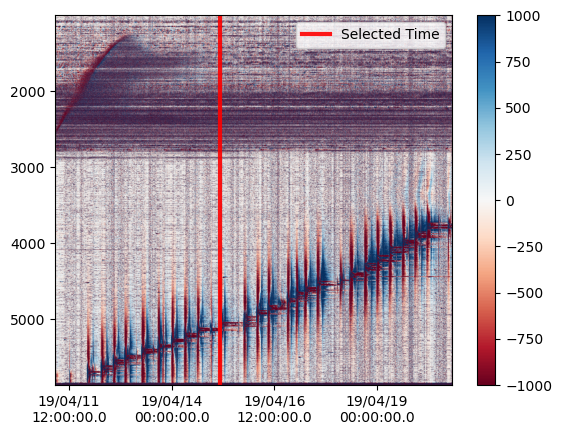
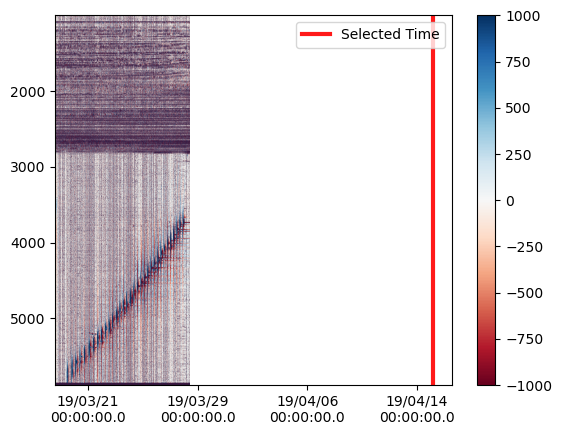

In [ ]:
# Display waterfalls in Jupyter notebook

from IPython.display import display, HTML

# Create waterfall for B4H (once you add das_index parameter)
DASwaterfall_B4H = DASViewer.create_waterfall(
    das_index=0,
    starttime='2019-04-15 00:00:00', 
    endtime='2019-04-17 00:00:00',
    selected_time='2019-04-15 04:28:00.000'
)

# Create waterfall for B1H
DASwaterfall_B1H = DASViewer.create_waterfall(
    das_index=1,
    starttime='2019-04-15 00:00:00', 
    endtime='2019-04-17 00:00:00',
    selected_time='2019-04-15 04:28:00.000'
)

# Display them side by side
display(HTML(f'''
    <div>
        <h3>B4H Waterfall</h3>
        <img src="{DASwaterfall_B4H}" style="width:45%; display:inline-block;">
        <h3>B1H Waterfall</h3>
        <img src="{DASwaterfall_B1H}" style="width:45%; display:inline-block;">
    </div>
'''))

In [26]:
# Run Dash app

# viewer = DataViewer(
#     MS_obj=MSViewer, 
#     well_objs=well_plot, 
#     DAS_obj=DASplot, 
#     DAS_image=DASwaterfall, 
#     DAS_viewer=DASViewer, 
#     well_trajectory_path=well_filepathB4H,

# )

# # viewer = DataViewer(well_objs=well_plot)

# # Set title for visualization.
# viewer.set_title('2019 Data Seismic and Well Trajectory Viewer')

# viewer.run_dash_app()